# Week 7 - TRANG Thomas
DIA 5 - Student ID : 703180

# Data set presentation
Attribute Information  
We have columns 0 to 23 which are features and the column 24 which is the target column. 
Features are : 
- Ultrasound reading at different angles
- The target is the move of the robot which can be a number between 1 to 4 so there are 4 targets

#Verifying tensorflow version
<p align="center">
  <img src="https://styles.redditmedia.com/t5_3alkk/styles/communityIcon_khftc7a8x0e31.png?width=256&s=854bf40c1eae453e43e1665926d99bb56506962f" />
</p>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
    pass

# Importing libraries 


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [ ]:
df=pd.read_csv('phpVeNa5j_train_0.csv',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.763,1.782,1.812,2.740,1.966,1.957,2.013,2.430,2.006,2.426,1.953,1.943,1.963,2.261,2.505,1.729,1.455,1.446,5.000,5.000,0.642,1.800,1.766,1.756,3
1,1.556,2.282,5.000,5.000,5.000,1.802,1.758,1.744,1.754,2.202,2.202,5.000,1.221,1.210,1.321,1.403,0.593,0.558,0.534,0.527,0.534,5.000,0.589,1.548,1
2,1.178,5.000,1.998,5.000,2.645,2.652,2.173,2.257,5.000,2.824,2.811,2.826,1.810,3.858,5.000,0.767,0.757,0.767,0.356,0.836,0.827,0.737,0.834,0.889,4
3,0.823,5.000,1.444,1.450,1.476,1.485,5.000,4.110,5.000,5.000,5.000,2.130,1.697,1.392,5.000,0.659,0.639,0.643,0.666,0.814,1.118,0.826,0.795,0.799,1
4,2.143,2.987,2.016,1.991,1.973,1.982,2.183,1.637,1.614,1.594,1.584,1.592,1.946,2.213,5.000,1.450,1.436,1.446,1.477,5.000,0.869,2.127,2.114,2.125,3


In [ ]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24      int64
dtype: object

All the 24 features are floats and the target is an integer

In [ ]:
df.iloc[:,-1].unique()

array([3, 1, 4, 2])

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
count,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000,4365.000000
mean,1.459664,2.313885,2.476248,2.807354,2.964367,2.900973,3.357436,2.567618,3.135468,2.836273,2.562274,2.082736,2.141298,2.196676,2.198069,1.194452,0.981655,0.908233,1.045541,1.056943,0.999298,1.761379,1.543245,1.579310,1.950515
std,0.789699,1.407554,1.241150,1.315740,1.338732,1.277022,1.404336,1.112686,1.352220,1.300258,1.387843,1.250825,1.420560,1.584431,1.710597,1.087007,0.927229,0.888972,1.129425,1.117338,0.861452,1.566627,1.288353,1.157658,1.029059
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.124000,0.859000,0.836000,0.810000,0.790000,0.779000,0.770000,0.756000,0.496000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000,1.000000
25%,0.918000,1.357000,1.530000,1.735000,1.780000,1.794000,1.949000,1.630000,1.805000,1.645000,1.580000,1.305000,1.195000,1.021000,0.860000,0.691000,0.581000,0.529000,0.523000,0.540000,0.567000,0.738000,0.789000,0.881000,1.000000
50%,1.331000,1.866000,2.050000,2.463000,2.667000,2.697000,3.225000,2.346000,2.815000,2.691000,2.011000,1.694000,1.613000,1.493000,1.321000,0.803000,0.738000,0.684000,0.690000,0.687000,0.760000,1.017000,1.068000,1.289000,2.000000
75%,1.800000,2.665000,2.735000,4.120000,4.321000,3.843000,5.000000,3.207000,5.000000,3.512000,3.260000,2.289000,2.398000,2.773000,4.385000,1.157000,0.910000,0.834000,0.854000,0.856000,0.996000,2.052000,1.526000,1.654000,2.000000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.000000,5.019000,5.000000,5.003000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [ ]:
df.shape

(4365, 25)

This dataset contains 4365 lines and 25 columns.
Among the columns, we have 24 features and 1 target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4365 non-null   float64
 1   1       4365 non-null   float64
 2   2       4365 non-null   float64
 3   3       4365 non-null   float64
 4   4       4365 non-null   float64
 5   5       4365 non-null   float64
 6   6       4365 non-null   float64
 7   7       4365 non-null   float64
 8   8       4365 non-null   float64
 9   9       4365 non-null   float64
 10  10      4365 non-null   float64
 11  11      4365 non-null   float64
 12  12      4365 non-null   float64
 13  13      4365 non-null   float64
 14  14      4365 non-null   float64
 15  15      4365 non-null   float64
 16  16      4365 non-null   float64
 17  17      4365 non-null   float64
 18  18      4365 non-null   float64
 19  19      4365 non-null   float64
 20  20      4365 non-null   float64
 21  21      4365 non-null   float64
 22  

# Preprocessing and splitting the data

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = to_categorical(y)

This is the first line of training data

In [ ]:
X[0]

array([1.763, 1.782, 1.812, 2.74 , 1.966, 1.957, 2.013, 2.43 , 2.006,
       2.426, 1.953, 1.943, 1.963, 2.261, 2.505, 1.729, 1.455, 1.446,
       5.   , 5.   , 0.642, 1.8  , 1.766, 1.756])

Let's verify if the categorical process is well done 

In [ ]:
df.iloc[0,-1]

3

In [ ]:
y[0]

array([0., 0., 0., 1., 0.], dtype=float32)

We can see that the categorical is well done

Now we are going to split into a training and a validation set in order to train our neural network

In [ ]:
rate_train = 0.85
total_X = X.shape[0]
n_train = int(rate_train * total_X)

X_train, X_test = X[:n_train,:], X[n_train:,:]
y_train, y_test = y[:n_train], y[n_train:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3710, 24) (3710, 5)
(655, 24) (655, 5)


#Fit the model

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
  
  model = Sequential([Dense(50, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(5, activation='softmax')])
  
  model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=lrate),
              metrics=['accuracy'])
  history = model.fit( trainX, trainy, validation_data =( testX , testy ),
                      epochs =100, verbose =0)
  return history

#Make vary the learning rate for SGD and visualisation of the loss and accuracy curves w.r.t epochs and learning rate

In [ ]:
learning_rates=[1E-0 , 1E-1, 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]
history=[]
for i in range(len(learning_rates)):
    history.append(fit_model( X_train , y_train , X_test , y_test , learning_rates[i]))

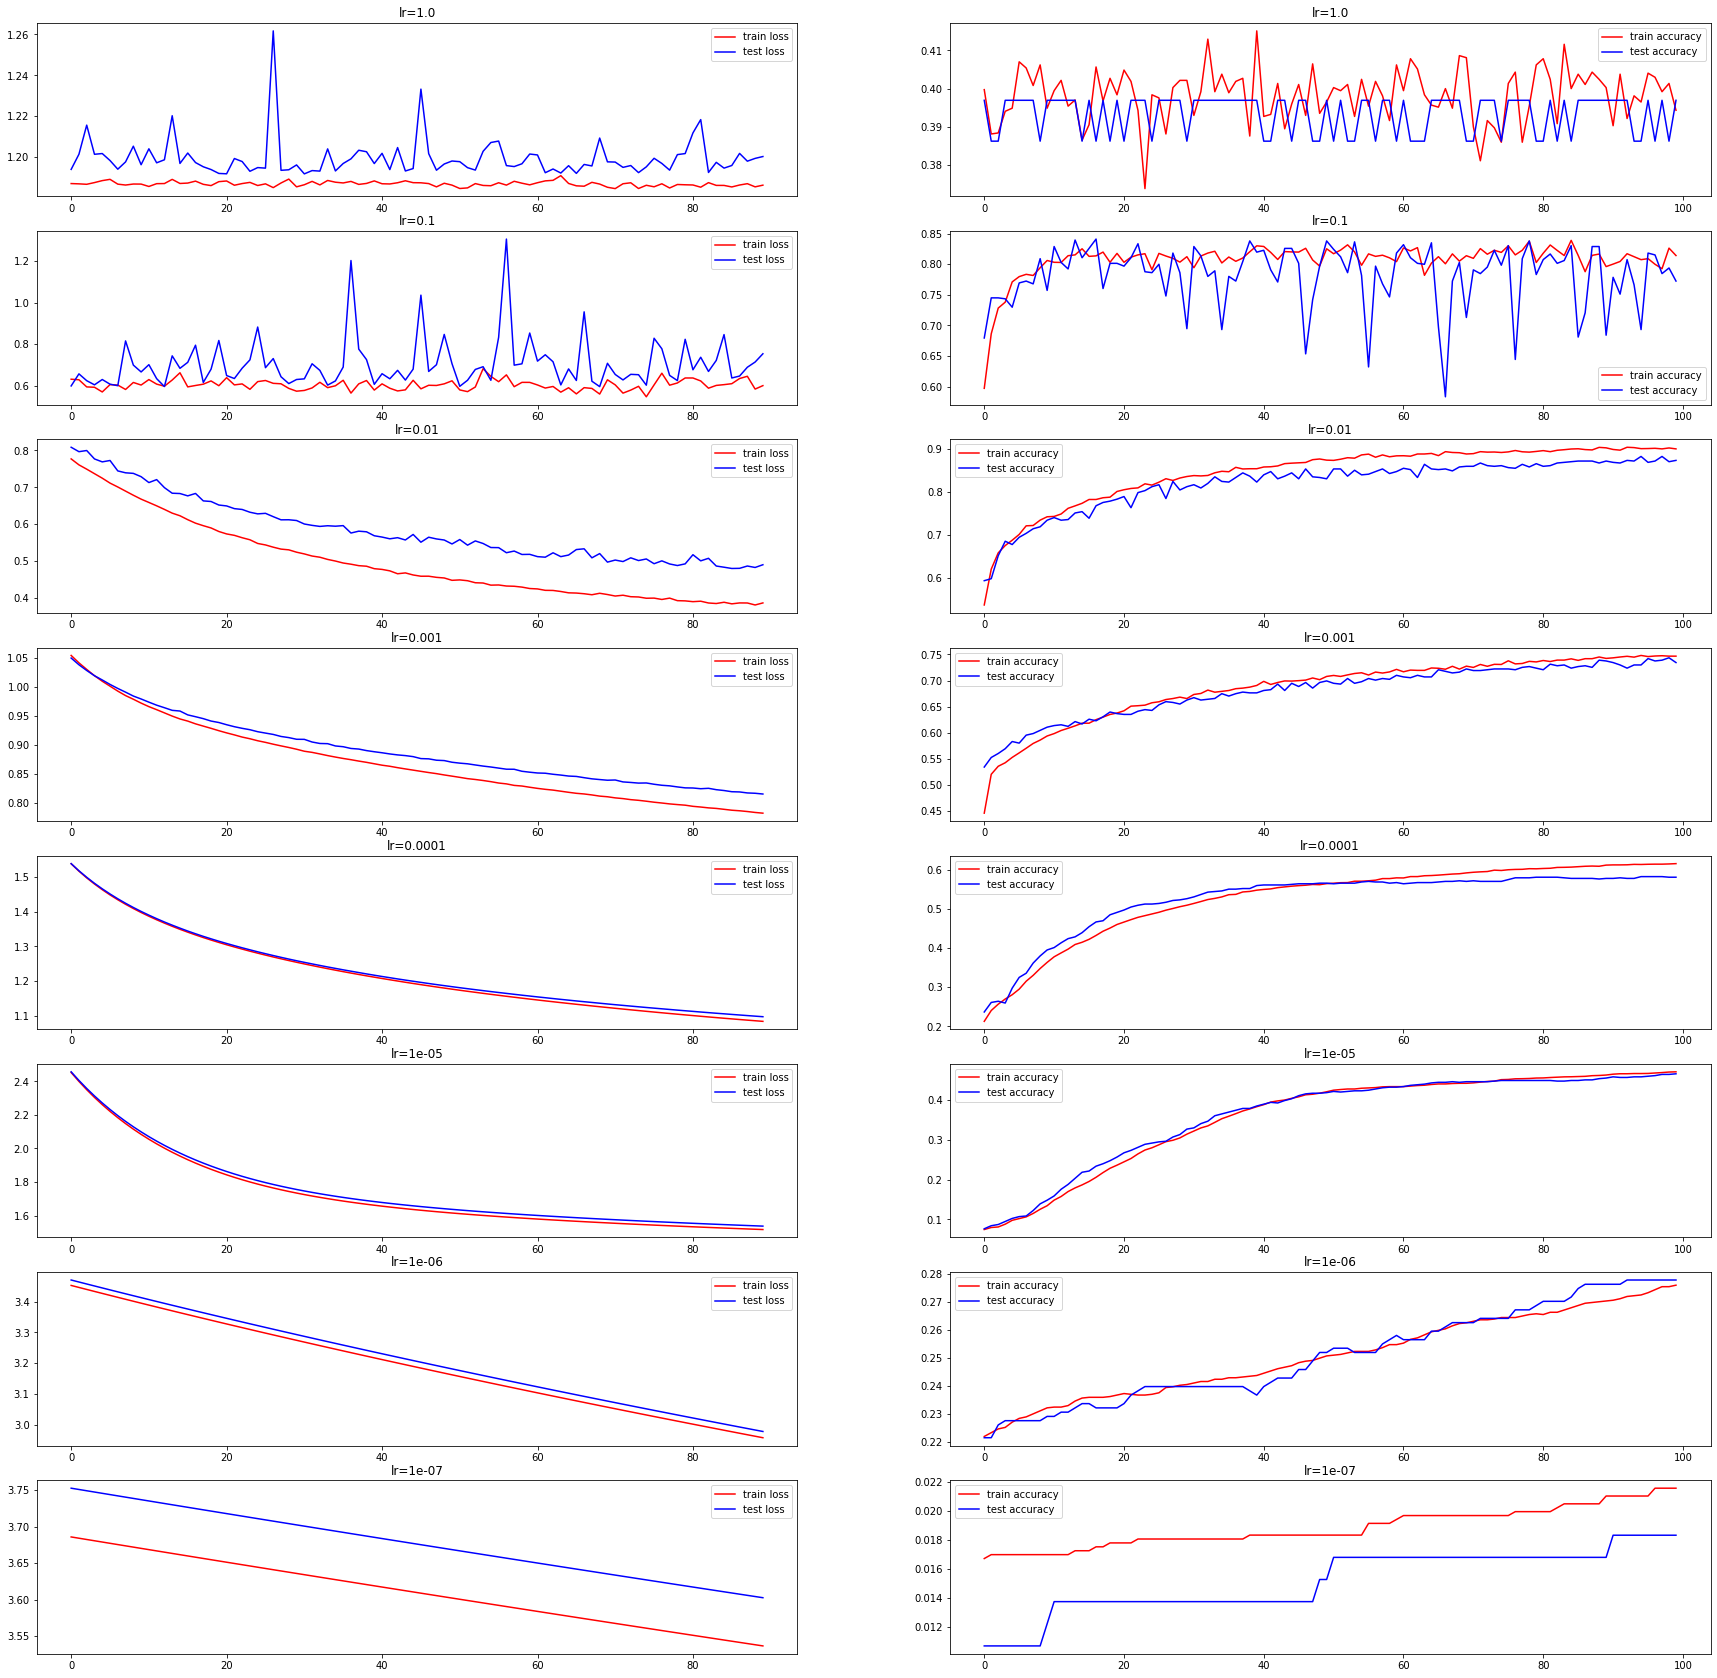

In [ ]:
plt.figure(figsize=(30,30))
for i in range(1,len(history)+1):
    plt.subplot(8,2,2*(i))
    plt.plot(history[i-1].history['accuracy'], label ='train accuracy', color = 'r')
    plt.plot(history[i-1].history['val_accuracy'], label ='test accuracy', color = 'b')
    plt.title('lr={}'.format(learning_rates[i-1]))
    plt.legend()
    plt.subplot(8,2,(i)*2-1)
    plt.plot(history[i-1].history['loss'][10:], label ='train loss', color = 'r')
    plt.plot(history[i-1].history['val_loss'][10:], label ='test loss', color = 'b')
    plt.title('lr={}'.format(learning_rates[i-1]))
    plt.legend()
plt.show()

We chose the learning rate equal to 0.01 as we have similar variations and training accuracy on top of the validation accuracy (the case in which the validation accuracy is on top of the training accuracy is not good at all)

# Choose the learning rate decay

In [ ]:
def learning_date_decay(initial_rate,decay,iteration):
    return initial_rate * (1.0/(1.0 + decay * iteration))

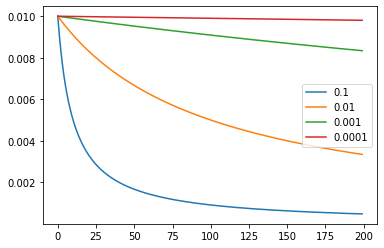

In [ ]:
decays = [1E-1 , 1E-2 , 1E-3 , 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays :
    # calculate learning rates for updates
    lrates = [ learning_date_decay ( lrate , decay , i) for i in range ( n_updates )]
    # plot result
    plt.plot( lrates , label = str( decay ))
plt.legend()
plt.show()

In [ ]:
def fit_model_decay(trainX, trainy, testX, testy, dec):
  
  model = Sequential([Dense(50, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(5, activation='softmax')])
  
  model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001,
              decay= dec), metrics=['accuracy'])
  
  history = model.fit( trainX, trainy, validation_data =( testX , testy ),
                      epochs=200, verbose=0)
  plt.plot(history.history['accuracy'], label='train accuracy', color='r')
  plt.plot(history.history['val_accuracy'], label='val accuracy', color='b')

  plt.title('decay = '+str(dec), pad=-50)
  plt.xlabel("Epochs")
  plt.ylabel("accuracy")
  plt.legend()

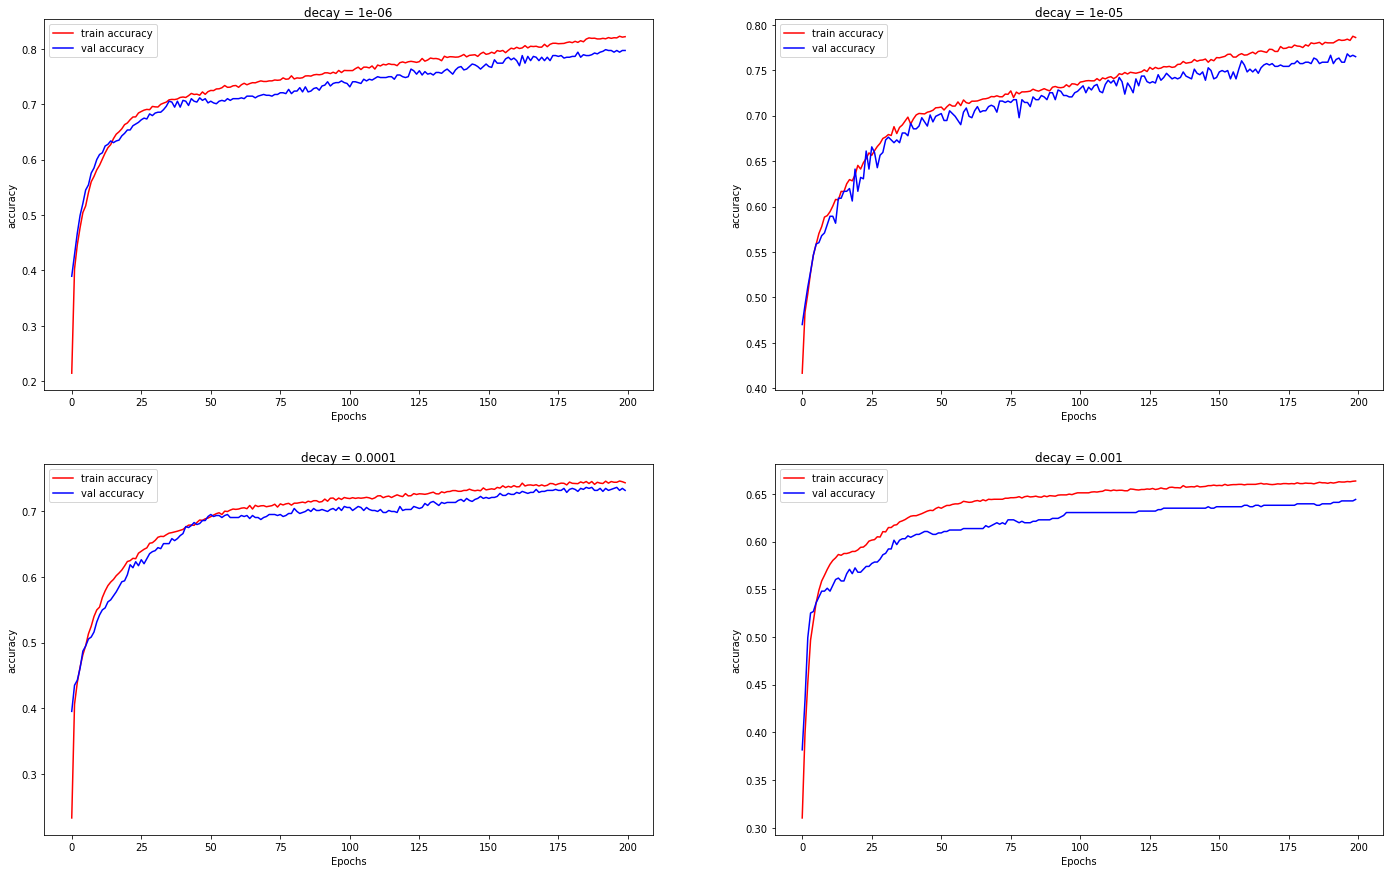

In [ ]:
decays = [1E-6, 1E-5, 1E-4, 1E-3]

plt.figure(figsize=(24,15))
for i in range(len(decays)):
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)

  fit_model_decay(X_train, y_train, X_test, y_test, decays[i])
plt.show()

We choose the rate decay equal to 0.001 as we are never in a case of overfitting

#Let's now test the optimizers

In [ ]:
def createModel():
    model= Sequential()
    model.add(Dense(50, input_shape=(24,),activation='relu'))
    model.add(Dense(5,activation='softmax'))
    return model
def fit_model(trainX , trainy , testX , testy,learning_rate):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=SGD(lr=learning_rate),metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =20 , verbose =0)
    return history

In [ ]:
def optimizer(trainX , trainy , testX , testy,optimizer,optname):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=optimizer, metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
    plt.plot(history.history['accuracy'], label ='train accuracy', color = 'r')
    plt.plot(history.history['val_accuracy'], label ='test accuracy ', color = 'b')
    plt.title ('optimizer={}'.format(optname) , pad = -50)
    plt.legend()

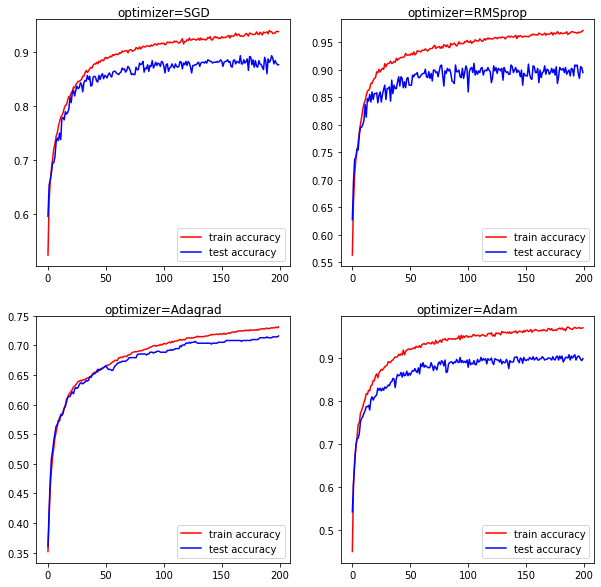

In [ ]:
plt.figure(figsize=(10,10))
optimizers = [SGD(learning_rate=0.01),RMSprop(), Adagrad(), Adam()]
optnames=['SGD','RMSprop','Adagrad','Adam']
for i in range(len(optimizers)):
    plot_no = 220 + (i +1)
    plt.subplot( plot_no )
    optimizer(  X_train , y_train , X_test , y_test , optimizers[i],optnames[i])
plt.show()

We are going to choose the SGD optimizer with the parameters we found by tuning

#Testing with the test set 

In [ ]:
df_test = pd.read_csv('/content/phpVeNa5j_test.csv', header=None)

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,2.396,2.529,2.575,5.000,1.988,3.737,2.281,2.661,3.286,2.859,3.740,0.920,0.894,0.878,0.879,1.551,1.037,0.951,0.914,0.996,1.035,5.000,1.575,2.393,2
1,1.318,1.563,1.574,1.598,1.623,5.000,3.278,3.207,5.000,3.776,5.000,2.082,1.412,1.405,1.298,0.968,0.709,0.527,0.511,0.502,0.514,1.663,1.051,1.289,1
2,0.579,0.565,5.000,1.358,1.351,1.363,4.828,4.217,5.000,5.000,2.913,1.729,1.709,5.000,5.000,0.765,0.754,0.760,0.871,0.812,0.509,0.488,0.477,0.489,1
3,1.108,1.147,1.830,5.000,4.245,5.000,5.000,2.603,2.603,2.591,1.761,1.727,1.722,1.737,1.779,1.871,0.493,0.469,0.468,0.488,0.504,1.082,1.067,1.083,4
4,2.662,2.642,2.643,2.198,2.510,1.415,1.368,1.344,1.349,1.360,1.607,1.620,0.825,0.778,0.778,5.000,0.874,0.866,0.878,0.798,0.773,5.000,3.648,3.621,2


In [ ]:
X_v = df_test.iloc[:,:-1].values
y_v = df_test.iloc[:,-1].values
y_v = to_categorical(y_v)

We verify the vectorization was well made which is the case, below we can see that label 2 corresponds to the vector [0., 0., 1., 0., 0.]

In [ ]:
df_test.iloc[:,-1][0:3]

0    2
1    1
2    1
Name: 24, dtype: int64

In [ ]:
y_v[0:3]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

We implement the neural network with set parameters thanks to the tuning and we fit on the entire training set

###We begin by testing with the model SGD tuned with a learning rate equal to 0.01 and learning decay equal to 0.001
We have an accuracy of 0.849 and a loss of 0.59

In [ ]:
model = Sequential([Dense(90, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(5, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01,
              decay= 0.001), metrics=['accuracy'])

model.fit(X, y, epochs=250, verbose=0)

In [ ]:
model.evaluate(X_v, y_v)

35/35 [==============================] - 0s 929us/step - loss: 0.5909 - accuracy: 0.8488


[0.5909278988838196, 0.8487626314163208]

### Here we test with another optimizer : Adam() and we got an acurracy equal to 0.937 and a loss of 0.283 whch is better than SGD even if it is tuned
I also test RMSProp optimizer the result is similar to the adam optimizer that's why I didn't leave it on the notebook

In [ ]:
model = Sequential([Dense(50, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(100, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(120, input_shape=(24,), activation='relu', kernel_regularizer=l2(0.005)),
                    Dense(5, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X, y, epochs=250, verbose=0)

In [ ]:
model.evaluate(X_v, y_v)

35/35 [==============================] - 0s 937us/step - loss: 0.2944 - accuracy: 0.9368


[0.29436004161834717, 0.9367552995681763]

# Convert to HTML 

In [ ]:
%%shell

jupyter nbconvert --to html /content/703180_TRANG_Thomas.ipynb

[NbConvertApp] Converting notebook /content/703180_TRANG_Thomas.ipynb to html
[NbConvertApp] Writing 949262 bytes to /content/703180_TRANG_Thomas.html
